# PyTorch Setup Instructions

This notebook was trained on PyTorch version 2.6.0+cu126 with CUDA 12.6 as the platform. To ensure this works correctly on your system, please run the following commands in the kernel terminal where you are running this notebook:

```bash
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126
pip install jupyter matplotlib numpy
```

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np


In [2]:
torch.__version__

'2.6.0+cu126'

In [3]:
print(torch.version.cuda)

12.6


In [4]:
torch.cuda.is_available()

True

In [5]:

# Check CUDA availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")



Using device: cuda


In [6]:

# Hyperparameters
batch_size = 128
latent_dim = 100
lr = 0.0002
epochs = 200



In [7]:

# Load MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True,
    transform=transform
)

train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size,
    shuffle=True
)



In [8]:
class ConditionalDiscriminator(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        
        self.model = nn.Sequential(
            nn.Linear(784 + num_classes, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        img_flat = img.view(img.size(0), -1)
        label_embedding = self.label_emb(labels)
        x = torch.cat([img_flat, label_embedding], dim=1)
        return self.model(x)

In [9]:
# Define the Generator (should be ConditionalGenerator)
class ConditionalGenerator(nn.Module):  # Changed from Generator
    def __init__(self, latent_dim, num_classes):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        
        self.model = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(512),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, z, labels):
        label_embedding = self.label_emb(labels)
        x = torch.cat([z, label_embedding], dim=1)
        return self.model(x).view(-1, 1, 28, 28)

# Define parameters
latent_dim = 100
num_classes = 10  # For MNIST digits 0-9

# Initialize models WITH CORRECT CLASS NAMES AND PARAMETERS
generator = ConditionalGenerator(latent_dim, num_classes).to(device)  # Changed here
discriminator = ConditionalDiscriminator(num_classes).to(device)  # Changed here

# Optimizers (keep same)
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

[Epoch 1/200] D_loss: 0.2923 G_loss: 5.9453
[Epoch 2/200] D_loss: 0.0556 G_loss: 28.3477
[Epoch 3/200] D_loss: 0.0887 G_loss: 33.0278
[Epoch 4/200] D_loss: 0.1370 G_loss: 27.9823
[Epoch 5/200] D_loss: 0.0686 G_loss: 14.3656
[Epoch 6/200] D_loss: 0.1124 G_loss: 17.0976
[Epoch 7/200] D_loss: 0.2052 G_loss: 15.6835
[Epoch 8/200] D_loss: 0.3093 G_loss: 14.6318
[Epoch 9/200] D_loss: 0.4793 G_loss: 11.8939
[Epoch 10/200] D_loss: 0.8654 G_loss: 7.8628
[Epoch 11/200] D_loss: 0.4934 G_loss: 13.7497
[Epoch 12/200] D_loss: 0.5431 G_loss: 11.6191
[Epoch 13/200] D_loss: 0.6543 G_loss: 12.5482
[Epoch 14/200] D_loss: 0.5143 G_loss: 13.2836
[Epoch 15/200] D_loss: 0.6122 G_loss: 9.9405
[Epoch 16/200] D_loss: 0.5146 G_loss: 9.9825
[Epoch 17/200] D_loss: 0.6843 G_loss: 13.0512
[Epoch 18/200] D_loss: 0.6995 G_loss: 10.5751
[Epoch 19/200] D_loss: 0.8842 G_loss: 9.2181
[Epoch 20/200] D_loss: 0.8068 G_loss: 13.4226


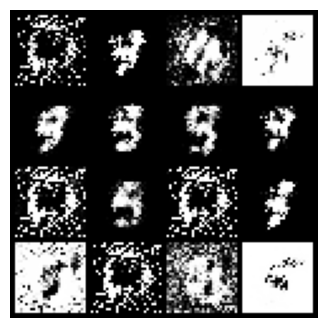

[Epoch 21/200] D_loss: 0.7282 G_loss: 10.8769
[Epoch 22/200] D_loss: 0.9122 G_loss: 10.8780
[Epoch 23/200] D_loss: 0.7463 G_loss: 9.3785
[Epoch 24/200] D_loss: 0.6263 G_loss: 7.4223
[Epoch 25/200] D_loss: 0.7424 G_loss: 8.9718
[Epoch 26/200] D_loss: 0.6013 G_loss: 13.4148
[Epoch 27/200] D_loss: 0.6457 G_loss: 7.4300
[Epoch 28/200] D_loss: 0.7236 G_loss: 9.1967
[Epoch 29/200] D_loss: 0.6106 G_loss: 10.5295
[Epoch 30/200] D_loss: 0.7482 G_loss: 2.8062
[Epoch 31/200] D_loss: 0.7919 G_loss: 2.1256
[Epoch 32/200] D_loss: 0.5580 G_loss: 2.6759
[Epoch 33/200] D_loss: 0.6770 G_loss: 3.2696
[Epoch 34/200] D_loss: 0.8783 G_loss: 2.3522
[Epoch 35/200] D_loss: 0.8566 G_loss: 3.4140
[Epoch 36/200] D_loss: 0.8357 G_loss: 2.4235
[Epoch 37/200] D_loss: 0.7653 G_loss: 3.0914
[Epoch 38/200] D_loss: 0.7663 G_loss: 3.7313
[Epoch 39/200] D_loss: 0.7170 G_loss: 2.0348
[Epoch 40/200] D_loss: 0.8075 G_loss: 3.0771


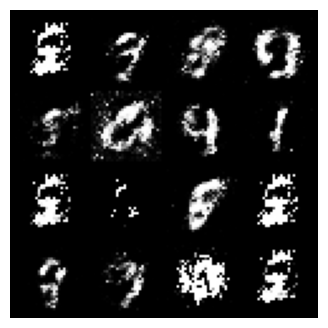

[Epoch 41/200] D_loss: 0.7417 G_loss: 2.7330
[Epoch 42/200] D_loss: 0.6491 G_loss: 2.5244
[Epoch 43/200] D_loss: 0.7548 G_loss: 2.3305
[Epoch 44/200] D_loss: 0.6779 G_loss: 2.6975
[Epoch 45/200] D_loss: 0.7918 G_loss: 3.1443
[Epoch 46/200] D_loss: 0.7626 G_loss: 1.7440
[Epoch 47/200] D_loss: 0.7047 G_loss: 2.5510
[Epoch 48/200] D_loss: 0.8073 G_loss: 2.6000
[Epoch 49/200] D_loss: 1.0014 G_loss: 2.1487
[Epoch 50/200] D_loss: 0.7756 G_loss: 2.1682
[Epoch 51/200] D_loss: 0.8412 G_loss: 2.2958
[Epoch 52/200] D_loss: 0.8742 G_loss: 2.2078
[Epoch 53/200] D_loss: 0.8765 G_loss: 3.0428
[Epoch 54/200] D_loss: 0.8037 G_loss: 2.2109
[Epoch 55/200] D_loss: 0.8032 G_loss: 2.4068
[Epoch 56/200] D_loss: 0.7958 G_loss: 2.0051
[Epoch 57/200] D_loss: 0.8411 G_loss: 1.8251
[Epoch 58/200] D_loss: 0.9217 G_loss: 2.1511
[Epoch 59/200] D_loss: 0.9636 G_loss: 1.7980
[Epoch 60/200] D_loss: 0.8472 G_loss: 2.9727


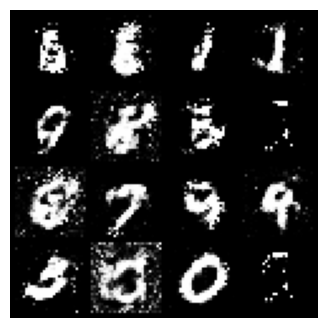

[Epoch 61/200] D_loss: 0.7232 G_loss: 2.5771
[Epoch 62/200] D_loss: 0.7527 G_loss: 2.0431
[Epoch 63/200] D_loss: 0.8981 G_loss: 2.3317
[Epoch 64/200] D_loss: 0.8287 G_loss: 2.1355
[Epoch 65/200] D_loss: 0.8177 G_loss: 1.9108
[Epoch 66/200] D_loss: 0.8776 G_loss: 2.0179
[Epoch 67/200] D_loss: 0.8733 G_loss: 1.6123
[Epoch 68/200] D_loss: 0.9690 G_loss: 1.8237
[Epoch 69/200] D_loss: 0.7891 G_loss: 2.1215
[Epoch 70/200] D_loss: 1.1447 G_loss: 1.7951
[Epoch 71/200] D_loss: 0.9132 G_loss: 1.4958
[Epoch 72/200] D_loss: 1.0724 G_loss: 1.0162
[Epoch 73/200] D_loss: 1.1266 G_loss: 1.0605
[Epoch 74/200] D_loss: 1.1379 G_loss: 1.0443
[Epoch 75/200] D_loss: 1.1164 G_loss: 1.1792
[Epoch 76/200] D_loss: 1.2036 G_loss: 1.0797
[Epoch 77/200] D_loss: 1.1681 G_loss: 1.2100
[Epoch 78/200] D_loss: 1.2069 G_loss: 0.9995
[Epoch 79/200] D_loss: 1.1280 G_loss: 1.3945
[Epoch 80/200] D_loss: 1.2166 G_loss: 1.0912


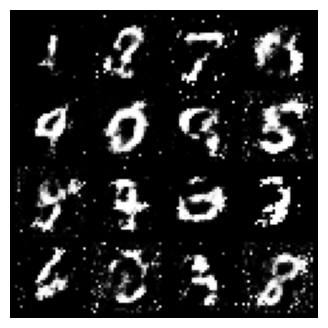

[Epoch 81/200] D_loss: 1.2384 G_loss: 1.0599
[Epoch 82/200] D_loss: 1.0909 G_loss: 1.0512
[Epoch 83/200] D_loss: 1.0751 G_loss: 1.1990
[Epoch 84/200] D_loss: 1.1605 G_loss: 1.0807
[Epoch 85/200] D_loss: 1.1404 G_loss: 1.0785
[Epoch 86/200] D_loss: 1.1685 G_loss: 0.9957
[Epoch 87/200] D_loss: 1.4561 G_loss: 0.9419
[Epoch 88/200] D_loss: 1.1625 G_loss: 1.0838
[Epoch 89/200] D_loss: 1.2155 G_loss: 0.9000
[Epoch 90/200] D_loss: 1.2449 G_loss: 0.8961
[Epoch 91/200] D_loss: 1.2590 G_loss: 0.8970
[Epoch 92/200] D_loss: 1.1546 G_loss: 1.0540
[Epoch 93/200] D_loss: 1.2788 G_loss: 1.0124
[Epoch 94/200] D_loss: 1.2676 G_loss: 0.9637
[Epoch 95/200] D_loss: 1.3565 G_loss: 0.8692
[Epoch 96/200] D_loss: 1.2273 G_loss: 0.8981
[Epoch 97/200] D_loss: 1.2290 G_loss: 1.0009
[Epoch 98/200] D_loss: 1.1514 G_loss: 1.1236
[Epoch 99/200] D_loss: 1.1906 G_loss: 1.0092
[Epoch 100/200] D_loss: 1.3034 G_loss: 0.8118


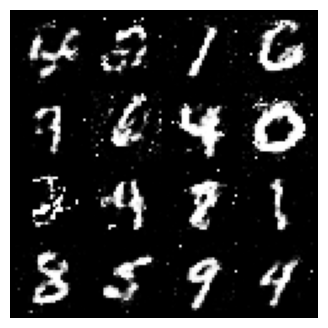

[Epoch 101/200] D_loss: 1.2735 G_loss: 0.8839
[Epoch 102/200] D_loss: 1.2173 G_loss: 0.9673
[Epoch 103/200] D_loss: 1.2783 G_loss: 0.9401
[Epoch 104/200] D_loss: 1.2644 G_loss: 0.8730
[Epoch 105/200] D_loss: 1.2550 G_loss: 0.9505
[Epoch 106/200] D_loss: 1.2047 G_loss: 0.9487
[Epoch 107/200] D_loss: 1.2655 G_loss: 1.0199
[Epoch 108/200] D_loss: 1.2901 G_loss: 0.8421
[Epoch 109/200] D_loss: 1.2871 G_loss: 0.8403
[Epoch 110/200] D_loss: 1.3645 G_loss: 0.7636
[Epoch 111/200] D_loss: 1.2828 G_loss: 0.8935
[Epoch 112/200] D_loss: 1.2556 G_loss: 0.9837
[Epoch 113/200] D_loss: 1.2835 G_loss: 0.9816
[Epoch 114/200] D_loss: 1.2217 G_loss: 0.9694
[Epoch 115/200] D_loss: 1.3667 G_loss: 0.8609
[Epoch 116/200] D_loss: 1.3696 G_loss: 0.7868
[Epoch 117/200] D_loss: 1.2707 G_loss: 0.8298
[Epoch 118/200] D_loss: 1.3121 G_loss: 0.8317
[Epoch 119/200] D_loss: 1.2816 G_loss: 0.7247
[Epoch 120/200] D_loss: 1.2926 G_loss: 0.9010


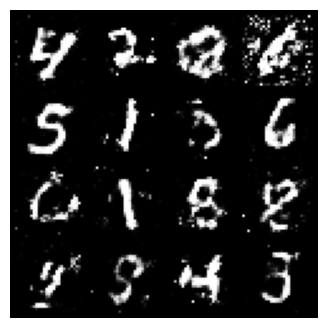

[Epoch 121/200] D_loss: 1.2752 G_loss: 0.9109
[Epoch 122/200] D_loss: 1.3116 G_loss: 0.9390
[Epoch 123/200] D_loss: 1.4022 G_loss: 0.7543
[Epoch 124/200] D_loss: 1.2841 G_loss: 0.8183
[Epoch 125/200] D_loss: 1.2967 G_loss: 0.8659
[Epoch 126/200] D_loss: 1.3887 G_loss: 0.6987
[Epoch 127/200] D_loss: 1.2415 G_loss: 0.8061
[Epoch 128/200] D_loss: 1.2719 G_loss: 0.9007
[Epoch 129/200] D_loss: 1.2812 G_loss: 1.0225
[Epoch 130/200] D_loss: 1.3098 G_loss: 0.8195
[Epoch 131/200] D_loss: 1.2210 G_loss: 0.9802
[Epoch 132/200] D_loss: 1.3357 G_loss: 0.8539
[Epoch 133/200] D_loss: 1.2915 G_loss: 0.8876
[Epoch 134/200] D_loss: 1.3553 G_loss: 0.7466
[Epoch 135/200] D_loss: 1.3256 G_loss: 0.7066
[Epoch 136/200] D_loss: 1.1956 G_loss: 0.8255
[Epoch 137/200] D_loss: 1.2626 G_loss: 0.8287
[Epoch 138/200] D_loss: 1.3249 G_loss: 0.9308
[Epoch 139/200] D_loss: 1.2468 G_loss: 0.8207
[Epoch 140/200] D_loss: 1.2333 G_loss: 0.8965


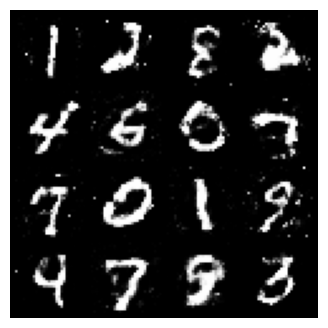

[Epoch 141/200] D_loss: 1.2292 G_loss: 0.8463
[Epoch 142/200] D_loss: 1.2781 G_loss: 0.8506
[Epoch 143/200] D_loss: 1.2962 G_loss: 0.8573
[Epoch 144/200] D_loss: 1.2823 G_loss: 0.8376
[Epoch 145/200] D_loss: 1.3193 G_loss: 0.8001
[Epoch 146/200] D_loss: 1.2069 G_loss: 0.8494
[Epoch 147/200] D_loss: 1.2541 G_loss: 0.7971
[Epoch 148/200] D_loss: 1.3002 G_loss: 0.8867
[Epoch 149/200] D_loss: 1.3141 G_loss: 0.8714
[Epoch 150/200] D_loss: 1.2194 G_loss: 0.8276
[Epoch 151/200] D_loss: 1.3420 G_loss: 0.7965
[Epoch 152/200] D_loss: 1.3113 G_loss: 0.7508
[Epoch 153/200] D_loss: 1.3799 G_loss: 0.7592
[Epoch 154/200] D_loss: 1.2430 G_loss: 0.8792
[Epoch 155/200] D_loss: 1.2476 G_loss: 0.8741
[Epoch 156/200] D_loss: 1.2552 G_loss: 0.8799
[Epoch 157/200] D_loss: 1.3331 G_loss: 0.8849
[Epoch 158/200] D_loss: 1.2315 G_loss: 0.9215
[Epoch 159/200] D_loss: 1.2218 G_loss: 0.8619
[Epoch 160/200] D_loss: 1.2710 G_loss: 0.8469


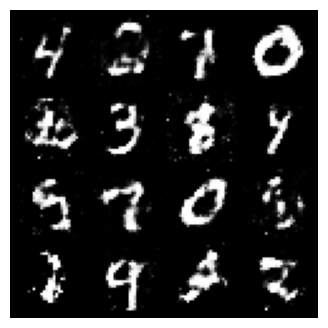

[Epoch 161/200] D_loss: 1.2551 G_loss: 0.8819
[Epoch 162/200] D_loss: 1.3373 G_loss: 0.8597
[Epoch 163/200] D_loss: 1.2557 G_loss: 0.9567
[Epoch 164/200] D_loss: 1.3519 G_loss: 0.8279
[Epoch 165/200] D_loss: 1.2975 G_loss: 0.7578
[Epoch 166/200] D_loss: 1.3026 G_loss: 0.8094
[Epoch 167/200] D_loss: 1.2847 G_loss: 0.8577
[Epoch 168/200] D_loss: 1.2764 G_loss: 0.8392
[Epoch 169/200] D_loss: 1.2717 G_loss: 0.8905
[Epoch 170/200] D_loss: 1.2962 G_loss: 0.8107
[Epoch 171/200] D_loss: 1.3371 G_loss: 0.8573
[Epoch 172/200] D_loss: 1.3244 G_loss: 0.7974
[Epoch 173/200] D_loss: 1.2944 G_loss: 0.7881
[Epoch 174/200] D_loss: 1.4382 G_loss: 0.7302
[Epoch 175/200] D_loss: 1.3383 G_loss: 0.8060
[Epoch 176/200] D_loss: 1.2933 G_loss: 0.8549
[Epoch 177/200] D_loss: 1.2685 G_loss: 0.8240
[Epoch 178/200] D_loss: 1.3363 G_loss: 0.8626
[Epoch 179/200] D_loss: 1.3445 G_loss: 0.7719
[Epoch 180/200] D_loss: 1.3470 G_loss: 0.7591


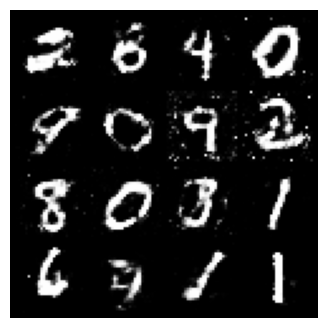

[Epoch 181/200] D_loss: 1.3762 G_loss: 0.7719
[Epoch 182/200] D_loss: 1.2700 G_loss: 0.8477
[Epoch 183/200] D_loss: 1.3387 G_loss: 0.7624
[Epoch 184/200] D_loss: 1.3423 G_loss: 0.8119
[Epoch 185/200] D_loss: 1.3464 G_loss: 0.8245
[Epoch 186/200] D_loss: 1.3199 G_loss: 0.8473
[Epoch 187/200] D_loss: 1.3745 G_loss: 0.8965
[Epoch 188/200] D_loss: 1.3890 G_loss: 0.7702
[Epoch 189/200] D_loss: 1.3092 G_loss: 0.8266
[Epoch 190/200] D_loss: 1.3591 G_loss: 0.9437
[Epoch 191/200] D_loss: 1.3428 G_loss: 0.7868
[Epoch 192/200] D_loss: 1.2615 G_loss: 0.9372
[Epoch 193/200] D_loss: 1.3186 G_loss: 0.8793
[Epoch 194/200] D_loss: 1.2920 G_loss: 0.8622
[Epoch 195/200] D_loss: 1.3549 G_loss: 0.8367
[Epoch 196/200] D_loss: 1.2498 G_loss: 0.8268
[Epoch 197/200] D_loss: 1.3880 G_loss: 0.6990
[Epoch 198/200] D_loss: 1.3260 G_loss: 0.7564
[Epoch 199/200] D_loss: 1.3719 G_loss: 0.7853
[Epoch 200/200] D_loss: 1.3186 G_loss: 0.9736


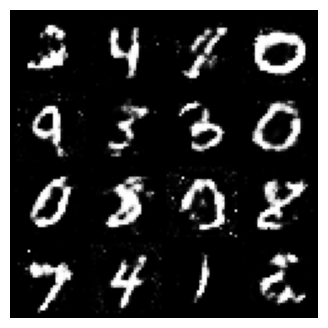

In [10]:

# Hyperparameters
num_classes = 10  # For MNIST digits 0-9

# Initialize models
generator = ConditionalGenerator(latent_dim, num_classes).to(device)
discriminator = ConditionalDiscriminator(num_classes).to(device)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss function (MISSING PIECE)
criterion = nn.BCELoss()  # <-- ADD THIS LINE

# Training loop
for epoch in range(epochs):
    for i, (imgs, labels) in enumerate(train_loader):
        real_imgs = imgs.to(device)
        labels = labels.to(device)  # Get actual digit labels
        
        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()
        
        # Real images with real labels
        real_output = discriminator(real_imgs, labels)  # Pass labels here
        d_loss_real = criterion(real_output, torch.ones_like(real_output))
        
        # Fake images with same labels
        z = torch.randn(imgs.size(0), latent_dim).to(device)
        fake_imgs = generator(z, labels)
        fake_output = discriminator(fake_imgs.detach(), labels)  # Pass labels here
        d_loss_fake = criterion(fake_output, torch.zeros_like(fake_output))
        
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()
        
        # -----------------
        #  Train Generator
        # -----------------
        optimizer_G.zero_grad()
        
        # Generate fake images with same labels
        gen_output = discriminator(fake_imgs, labels)  # Pass labels here
        g_loss = criterion(gen_output, torch.ones_like(gen_output))
        
        g_loss.backward()
        optimizer_G.step()
        
    # Print progress
    print(f"[Epoch {epoch+1}/{epochs}] D_loss: {d_loss.item():.4f} G_loss: {g_loss.item():.4f}")
    
    # During training visualization
    if (epoch+1) % 20 == 0:
        with torch.no_grad():
            test_z = torch.randn(16, latent_dim).to(device)
            test_labels = torch.randint(0, 10, (16,)).to(device)  # Random labels 0-9
            generated = generator(test_z, test_labels).cpu()  # Add labels here
            
            plt.figure(figsize=(4,4))
            plt.imshow(np.transpose(make_grid(generated, nrow=4, padding=2, normalize=True),(1,2,0)))
            plt.axis('off')
            plt.show()

# Save models
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')

Discriminator Accuracy on Real: 0.4688
Discriminator Accuracy on Fake: 0.7670
Total Discriminator Accuracy: 0.6179


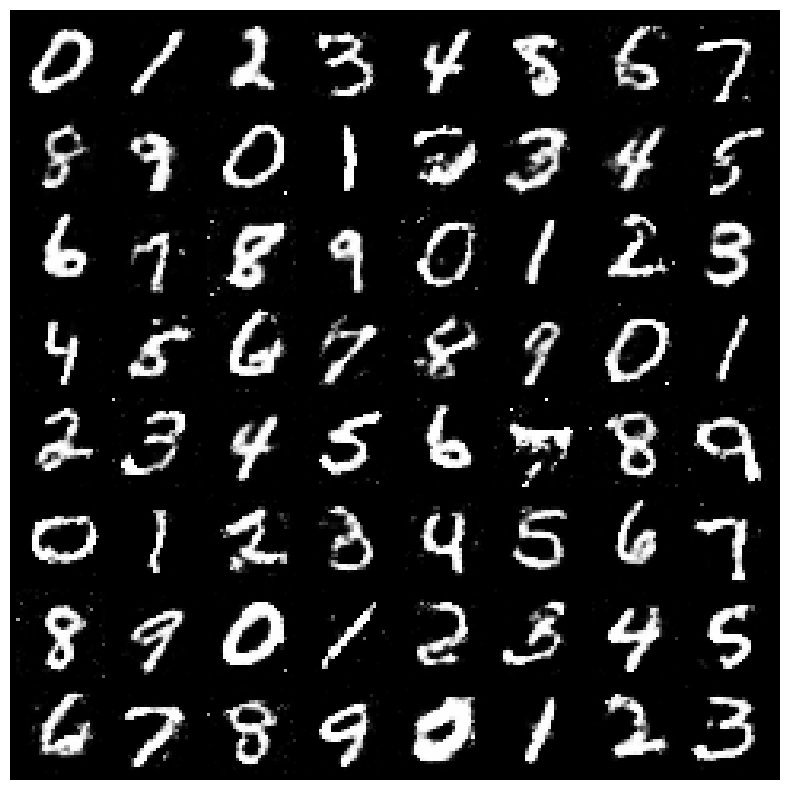

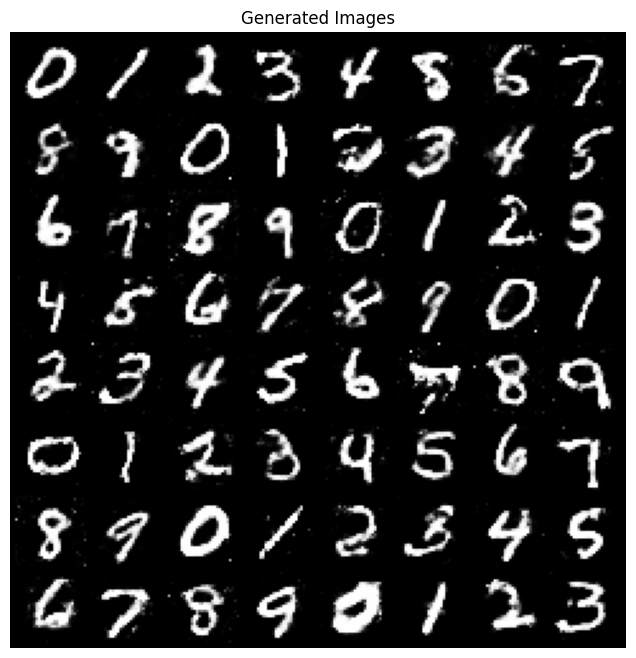

In [12]:
def show_images(images, title="Generated Images"):
    plt.figure(figsize=(8,8))
    plt.title(title)
    plt.axis('off')
    # Use .clamp to handle any remaining outliers
    grid = make_grid(images.clamp(-1,1), nrow=8, padding=2, normalize=True)
    plt.imshow(np.transpose(grid.cpu().numpy(), (1,2,0)))
    plt.show()

# Updated evaluation function for conditional GAN
def evaluate_gan(generator, discriminator, latent_dim, real_images, real_labels, n_samples=1000):
    generator.eval()
    discriminator.eval()
    with torch.no_grad():
        # Generate fake images with random labels
        z = torch.randn(n_samples, latent_dim).to(device)
        fake_labels = torch.randint(0, 10, (n_samples,)).to(device)
        fake_images = generator(z, fake_labels)
        
        # Get real images with their actual labels
        real_labels = real_labels[:n_samples].to(device)
        
        # Calculate discriminator outputs WITH LABELS
        real_output = discriminator(real_images, real_labels)
        fake_output = discriminator(fake_images, fake_labels)
        
        # Calculate discriminator accuracy
        real_acc = (real_output >= 0.5).float().mean()
        fake_acc = (fake_output < 0.5).float().mean()
        total_acc = (real_acc + fake_acc) / 2
        
        # Generate specific digits for visualization
        test_z = torch.randn(64, latent_dim).to(device)
        test_labels = torch.LongTensor([i % 10 for i in range(64)]).to(device)  # Digits 0-9 repeated
        generated = generator(test_z, test_labels).cpu()
        
    print(f"Discriminator Accuracy on Real: {real_acc.item():.4f}")
    print(f"Discriminator Accuracy on Fake: {fake_acc.item():.4f}")
    print(f"Total Discriminator Accuracy: {total_acc.item():.4f}")
    
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(np.transpose(make_grid(generated, padding=2, normalize=True, nrow=8),(1,2,0)))
    plt.show()
    
    show_images(generated)

# Load real images WITH LABELS for evaluation
real_images, real_labels = next(iter(train_loader))
real_images = real_images[:1000].to(device)
real_labels = real_labels[:1000]  # Keep corresponding labels

# Run evaluation
evaluate_gan(generator, discriminator, latent_dim, real_images, real_labels)

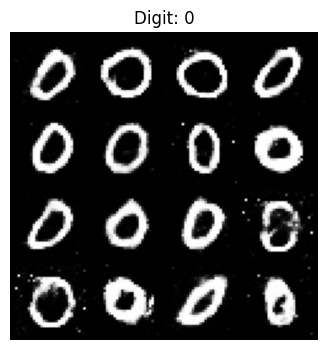

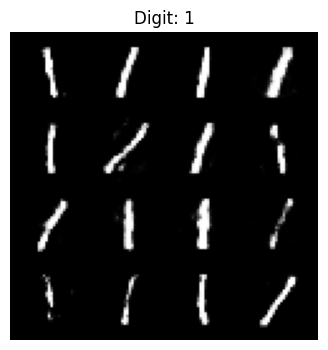

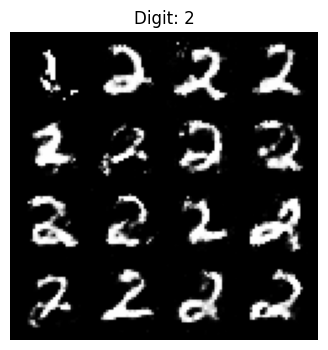

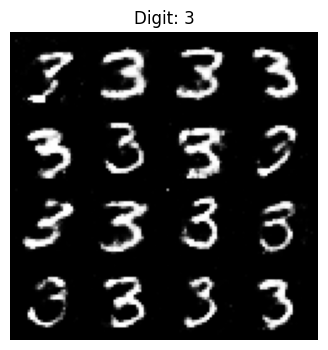

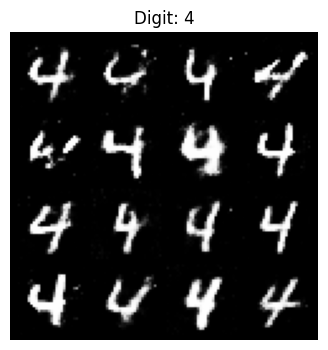

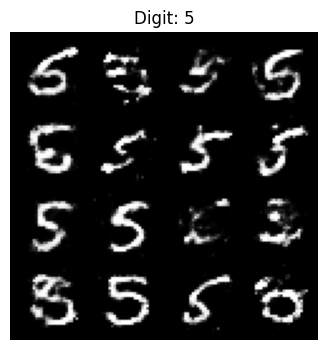

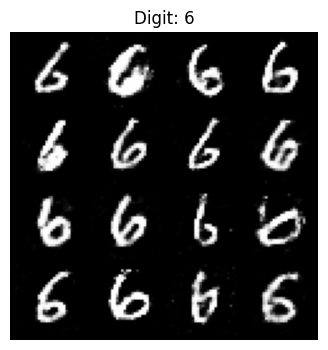

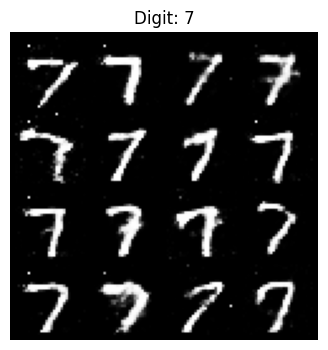

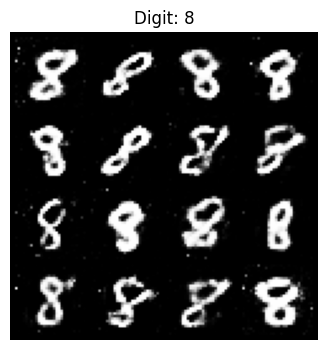

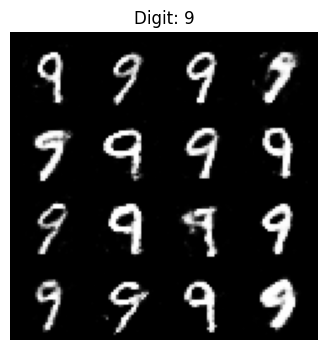

In [13]:
def generate_specific_digit(digit: int, num_samples: int = 16):
    generator.eval()
    with torch.no_grad():
        # Create labels tensor for desired digit
        labels = torch.full((num_samples,), digit, dtype=torch.long).to(device)
        
        z = torch.randn(num_samples, latent_dim).to(device)
        generated = generator(z, labels).cpu()  # Pass both z and labels
        
        plt.figure(figsize=(4,4))
        plt.imshow(np.transpose(make_grid(generated, nrow=4, padding=2, normalize=True), (1,2,0)))
        plt.title(f"Digit: {digit}")
        plt.axis('off')
        plt.show()

# Example: Generate 16 samples of digit 
for i in range(0,10):
    generate_specific_digit(i)